In [2]:
import matplotlib.pyplot as plt
from numpy import array,zeros,arange

###### definiuję metody:

###### zmienne:

In [3]:
d=0.001         # szybkosc apoptozy kom. podatnych
L=10**5         # L szybkosc odtwa. kom. podatnych
b=1.5           #szybkosc infekowania kom. podatnych
a=1             #szybkosc niszczenia kom. zak.
k=1             #szybkosc produkcji wirusa w zak. kom
u=1             #szybkosc umierania wirusa
Npodatne=10**9  # initial conditions 30*10**12 calkowita liczba kom.
To=Npodatne
Io=1
Vo=10**2
dt=0.1
to=0
te= 1000
t=arange(to,te,dt)
N=len(t)
y=zeros([N,3])
y[0,0]=To
y[0,1]=Io
y[0,2]=Vo

def HIV(state,t):
    T=state[0] # T kom. podatne
    I=state[1] # I kom. zainfekowane
    V=state[2] # V ilość aktywnego wirusa
    dT=L-d*T-b*T*V/Npodatne
    di=b*T*V/Npodatne-a*I
    dv=k*I-u*V
    return array([dT,di,dv])

def Runge_Kutta(y,t,dt,derivative):
    k1=dt*derivative(y,t)
    k2=dt*derivative(y+k1/2.,t+0.5*dt)
    k3=dt*derivative(y+k2/2.,t+0.5*dt)
    k4=dt*derivative(y+k3,t+dt)
    y_next=y+1/6.*(k1+2*k2+2*k3+k4)
    return y_next
for i in range(N-1):
    y[i+1]=Runge_Kutta(y[i],t[i],dt,HIV)

Tt=[y[j,0] for j in range(N)]
It=[y[j,1] for j in range(N)]
Vt=[y[j,2] for j in range(N)]



###### wykres:

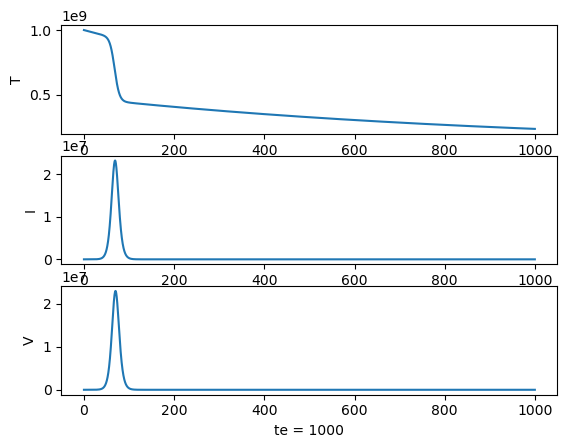

In [4]:
plt.subplot(3,1,1)
plt.plot(t,Tt)
plt.ylabel("T")
plt.xlabel("time")
plt.subplot(3,1,2)
plt.plot(t,It)
plt.ylabel("I")
plt.xlabel("time")
plt.subplot(3,1,3)
plt.plot(t,Vt)
plt.ylabel("V")
plt.xlabel("te = 1000")
plt.show()